# A Guided Tour of LSST Calexps
<br>Owner(s): **David Shupe** ([@stargaser](https://github.com/LSSTScienceCollaborations/StackClub/issues/new?body=@stargaser))
<br>Last Verified to Run: **2018-08-07**
<br>Verified Stack Release: **v16.0** (also lsst_w_2018_31, with `getName` modification)

We'll inspect a visit image ``calexp`` object, and then show how a coadd image differs.

### Learning Objectives:

After working through this tutorial you should be able to follow some best practices when working with LSST ``calexp`` (image) objects.

### Logistics
This notebook is intended to be runnable on `lsst-lspdev.ncsa.illinois.edu` from a local git clone of https://github.com/LSSTScienceCollaborations/StackClub.

## Set-up

In [1]:
from lsst.daf.persistence import Butler

In [2]:
import lsst.afw.display as afw_display

### Retrieving and inspecting a calexp

For the first part of this tutorial we will use simulated LSST data from Twinkles, see https://github.com/LSSTDESC/Twinkles/blob/master/README.md

Define a data directory and create a Butler

In [3]:
datadir = '/project/shared/data/Twinkles_subset/output_data_v2'
butler = Butler(datadir)

Other notebooks show how to view what data are available in a Butler object. Here we get a specific one.

In [4]:
dataId = {'filter': 'r', 'raft': '2,2', 'sensor': '1,1', 'visit': 235}
calexp = butler.get('calexp', **dataId)

In terms of pixel data, a calexp contains an image, a mask, and a variance.

Let's see how to access the image.

In [5]:
calexp.image

To show the pixel data, we will make use of the matplotlib backend to `lsst.afw.display`.

Due to current limitations of this backend, the display must be defined and used in the same code cell, much as matplotlib commands in a notebook must all be in one cell to produce a plot.

In [6]:
%matplotlib inline

If the entire calexp is displayed, masks will be overlaid. Here we will eschew the mask display by showing only the image.

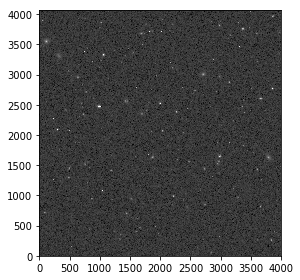

In [7]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(calexp.image)

To access the pixel values as an array, use the `.array` attribute.

In [8]:
data = calexp.image.array
data

array([[ 33.70561   , -37.294224  ,  38.705997  , ...,  28.236465  ,
         45.24491   ,  23.253298  ],
       [-36.29126   ,  31.708914  ,  27.709076  , ...,  45.227432  ,
         15.235818  ,  -9.755736  ],
       [  1.7118104 ,  52.711983  ,  19.71215   , ...,  -0.78154063,
         19.22678   , -65.76478   ],
       ...,
       [ 25.326166  ,  57.32579   ,  55.32548   , ..., -48.879063  ,
         25.122355  ,  32.12382   ],
       [ 81.34173   ,  55.341354  ,  93.34099   , ..., -15.883663  ,
        -15.882242  ,  -2.880832  ],
       [ 61.357323  ,  59.35694   ,  54.356567  , ...,  -2.8882744 ,
        -57.88685   , -38.885437  ]], dtype=float32)

In [9]:
data.__class__

numpy.ndarray

Let's list all the methods for our calexp.

In [10]:
calexp_methods = [m for m in dir(calexp) if not m.startswith('_')]

In [11]:
calexp_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCalib',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'setCalib',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'variance',
 'writeFits']

Access the masked Image

In [12]:
calexp.maskedImage

Access the variance object and the underlying Numpy array

In [13]:
calexp.variance

In [14]:
calexp.variance.array

array([[854., 783., 859., ..., 846., 863., 841.],
       [784., 852., 848., ..., 863., 833., 808.],
       [822., 873., 840., ..., 817., 837., 752.],
       ...,
       [845., 877., 875., ..., 772., 846., 853.],
       [901., 875., 913., ..., 805., 805., 818.],
       [881., 879., 874., ..., 818., 763., 782.]], dtype=float32)

Access the mask and its underlying array

In [15]:
calexp.mask

In [16]:
calexp.mask.array

array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       ...,
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16],
       [16, 16, 16, ..., 16, 16, 16]], dtype=int32)

Get the dimensions of the image, mask and variance

In [17]:
calexp.getDimensions()

Extent2I(4000, 4072)

The image, maskedImage and Exposure objects in `lsst.afw.display` include information on **LSST pixels**, which are 0-based with an optional offset.

For a calexp these are usually zero.

In [18]:
calexp.getXY0()

Point2I(0, 0)

In [19]:
calexp.getX0(), calexp.getY0()

(0, 0)

Access the wcs object

In [20]:
wcs = calexp.getWcs()
wcs

The WCS object can be used e.g. to convert pixel coordinates into sky coordinates

In [21]:
wcs.pixelToSky(100.0, 100.0)

SpherePoint(52.86196407219792*afwGeom.degrees, -27.363616065026967*afwGeom.degrees)

Let's try accessing the metadata, and see what (header) keywords we have.

In [22]:
metadata = calexp.getMetadata()
# help(metadata)
metadata.getOrderedNames()

['COMMENT',
 'PHOV0',
 'PHOV1',
 'PHOV2',
 'PHOV3',
 'PHOV4',
 'PHOV5',
 'PHOV6',
 'OBSID',
 'DATASET',
 'MJD-OBS',
 'OUTPDIR',
 'OUTFILE',
 'SEDDIR',
 'IMGDIR',
 'TELMODE',
 'TRKMODE',
 'DIFMODE',
 'DETMODE',
 'ZERMODE',
 'STRLGHT',
 'APRMODE',
 'GHOMODE',
 'SATMODE',
 'BLOOMNG',
 'EVTFILE',
 'EVTFITSFILE',
 'THRFILE',
 'PLTSCAL',
 'MINR',
 'MAXR',
 'SHUTERR',
 'TIMEOFF',
 'FILTNM',
 'SEED',
 'PRA',
 'PDEC',
 'SPIDANG',
 'ROTJITT',
 'ELEJITT',
 'AZIJITT',
 'TRKFILE',
 'GNDLEVL',
 'XTELLOC',
 'YTELLOC',
 'ZER 0 0',
 'ZER 0 1',
 'ZER 0 2',
 'ZER 0 3',
 'ZER 0 4',
 'ZER 0 5',
 'ZER 0 6',
 'ZER 0 7',
 'ZER 0 8',
 'ZER 0 9',
 'ZER 010',
 'ZER 011',
 'ZER 012',
 'ZER 013',
 'ZER 014',
 'ZER 015',
 'ZER 016',
 'ZER 017',
 'ZER 018',
 'ZER 019',
 'ZER 020',
 'ZER 1 0',
 'ZER 1 1',
 'ZER 1 2',
 'ZER 1 3',
 'ZER 1 4',
 'ZER 1 5',
 'ZER 1 6',
 'ZER 1 7',
 'ZER 1 8',
 'ZER 1 9',
 'ZER 110',
 'ZER 111',
 'ZER 112',
 'ZER 113',
 'ZER 114',
 'ZER 115',
 'ZER 116',
 'ZER 117',
 'ZER 118',
 'ZER 119',

In [23]:
metadata.get('CCDTEMP')

173.0

> Post release 16.0, the `getName` method will be available.

Check if our calexp has a PSF

In [24]:
calexp.hasPsf()

True

In [25]:
psf = calexp.getPsf()

The PSF object can be used to get a realization of a PSF at a specific point

In [26]:
from lsst.geom.coordinates import Point2D
psfimage = psf.computeImage(Point2D(100.,100.))

Access the calibration object which can be used to convert instrumental magnitudes to AB magnitudes

In [27]:
calib = calexp.getCalib()
calib

### Image cutouts

We can make a cutout from the calexp in our session.

In [28]:
import lsst.afw.geom as afwGeom
import lsst.afw.image as afwImage

In [29]:
bbox = afwGeom.Box2I()
bbox.include(afwGeom.Point2I(2200,3200))
bbox.include(afwGeom.Point2I(2800,3800))
cutout = calexp.Factory(calexp, bbox, afwImage.LOCAL)

Notice that when the image is displayed, the pixel values relate to the parent image.

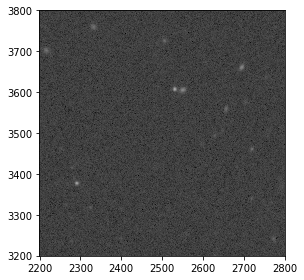

In [30]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(cutout.image)

The coordinate of the lower-left-hand pixel is XY0.

In [31]:
cutout.getXY0()

Point2I(2200, 3200)

If a cutout was all that was desired from the start, we could have used our BoundingBox together with our Butler to have read in only the cutout.

In [32]:
cutout_calexp = butler.get('calexp_sub', bbox=bbox, immediate=True, dataId=dataId)
cutout_calexp.getDimensions()

Extent2I(601, 601)

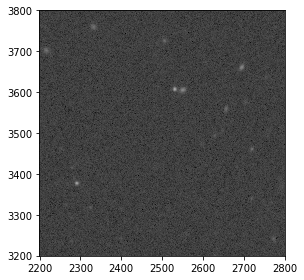

In [33]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(cutout_calexp.image)

The `clone` method makes a deep copy. The result can be sliced with a BoundingBox

In [34]:
clone_cutout = calexp.clone()[bbox]

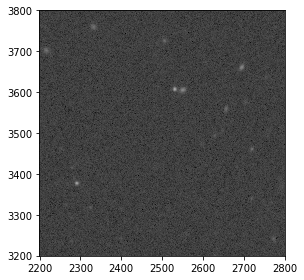

In [35]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(clone_cutout.image)

## Repeat for a coadd

For this last section, we will use Hyper Suprime-Cam (HSC) data that has been modified for tutorial purposes.

In [36]:
coadd_butler = Butler('/project/shared/data/with-globular/')

In [37]:
coadd_butler.getKeys('deepCoadd_calexp')

{'filter': str, 'tract': int, 'patch': str}

We cannot use queryMetadata to look up what is available for coadds. This will be fixed in Butler Gen3.

For the time being, open a terminal and list files in `/project/shared/data/with-globular/` to see what's available. Or just carry on using the following example:

In [38]:
dataId = {'filter':'HSC-I', 'tract':9813, 'patch':'4,4'}

Retrieve a coadd `calexp`, and see what methods it provides.

In [39]:
coadd = coadd_butler.get('deepCoadd_calexp', dataId)

In [40]:
coadd_methods = [m for m in dir(coadd) if not m.startswith('_')]

In [41]:
coadd_methods

['Factory',
 'clone',
 'convertD',
 'convertF',
 'dtype',
 'getBBox',
 'getCalib',
 'getDetector',
 'getDimensions',
 'getFilter',
 'getHeight',
 'getImage',
 'getInfo',
 'getMask',
 'getMaskedImage',
 'getMetadata',
 'getPsf',
 'getVariance',
 'getWcs',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'hasPsf',
 'hasWcs',
 'image',
 'mask',
 'maskedImage',
 'readFits',
 'setCalib',
 'setDetector',
 'setFilter',
 'setImage',
 'setInfo',
 'setMask',
 'setMaskedImage',
 'setMetadata',
 'setPsf',
 'setVariance',
 'setWcs',
 'setXY0',
 'variance',
 'writeFits']

In [42]:
set(coadd_methods).symmetric_difference(set(calexp_methods))

set()

The result of the `set` command above shows that a calexp and a coadd have the same methods.

A `deepCoadd_calexp` and a visit `calexp` differ mainly in the masks and the xy0 value.

In [43]:
calexp.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 9,
 'CLIPPED': 10,
 'CR': 3,
 'CROSSTALK': 11,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 12,
 'INTRP': 2,
 'NOT_DEBLENDED': 13,
 'NO_DATA': 8,
 'REJECTED': 14,
 'SAT': 1,
 'SENSOR_EDGE': 15,
 'SUSPECT': 7,
 'UNMASKEDNAN': 16}

In [44]:
coadd.mask.getMaskPlaneDict()

{'BAD': 0,
 'BRIGHT_OBJECT': 9,
 'CLIPPED': 10,
 'CR': 3,
 'CROSSTALK': 11,
 'DETECTED': 5,
 'DETECTED_NEGATIVE': 6,
 'EDGE': 4,
 'INEXACT_PSF': 12,
 'INTRP': 2,
 'NOT_DEBLENDED': 13,
 'NO_DATA': 8,
 'REJECTED': 14,
 'SAT': 1,
 'SENSOR_EDGE': 15,
 'SUSPECT': 7,
 'UNMASKEDNAN': 16}

In [45]:
coadd.getXY0()

Point2I(15900, 15900)

Display the coadd with all masks visible.

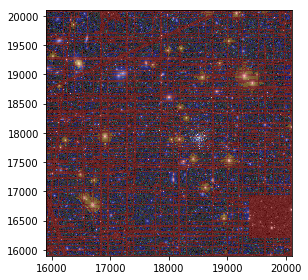

In [46]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd)

Display the image data only with a zoom and pan to some nice-looking galaxies, to show off our hyperbolic arcsine stretch:

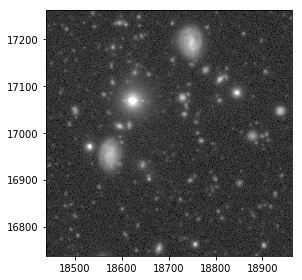

In [47]:
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("asinh", "zscale")
display1.mtv(coadd.image)
display1.zoom(16)
display1.pan(18700, 17000)